In [1]:
# here I import the libraries that I will be using
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [3]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# I decided to rename all the columns for better understanding (you do not have to do this).
df_netflix.columns = ['SHOW_ID', 'TYPE', 'TITLE', 'DIRECTOR', 'CAST', 'COUNTRY', 'DATE_ADDED', 'RELEASE_YEAR', 'RATING', 'DURATION', 'LISTED_IN', 'DESCRIPTION']

In [5]:
df_netflix.head()

,SHOW_ID,TYPE,TITLE,DIRECTOR,CAST,COUNTRY,DATE_ADDED,RELEASE_YEAR,RATING,DURATION,LISTED_IN,DESCRIPTION
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
# Data Hygiene: checking if the SHOW_ID column has any duplicated values.
df_netflix.SHOW_ID.duplicated().sum()

0

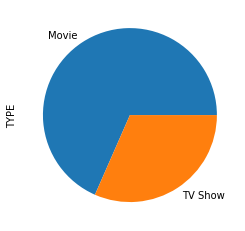

In [7]:
# Type: let's see how many movies and tv shows there are
df_netflix.TYPE.value_counts().plot(kind='pie')

In [8]:
# Director: let's see who are the most famous directors and how many movies they have directed
df_netflix.DIRECTOR.value_counts().head(10)[1:]

Marcus Raboy         14
Jay Karas            13
Jay Chapman          12
Steven Spielberg      9
Martin Scorsese       9
Lance Bangs           8
David Dhawan          8
Johnnie To            8
Quentin Tarantino     7
Name: DIRECTOR, dtype: int64

In [9]:
# I created this list with the top ten directors 
directors = ['Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas', 'Jay Chapman', 'Martin Scorsese', 'Steven Spielberg', 'David Dhawan', 'Lance Bangs', 'Johnnie To']

Raúl Campos, Jan Suter


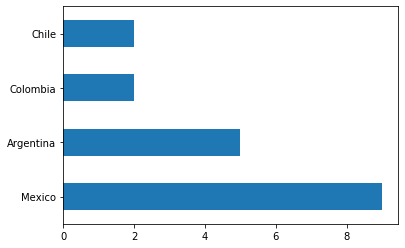

Marcus Raboy


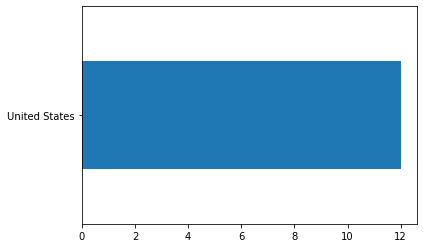

Jay Karas


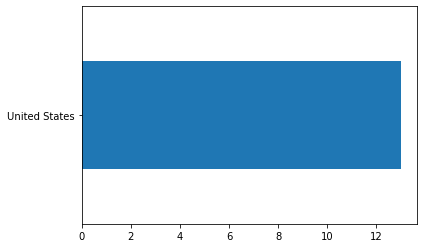

Jay Chapman


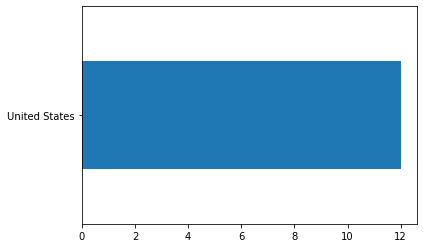

Martin Scorsese


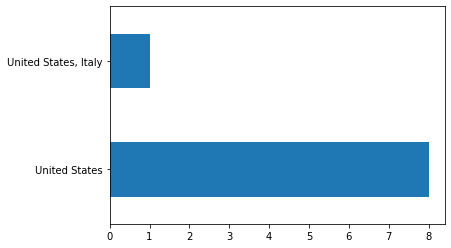

Steven Spielberg


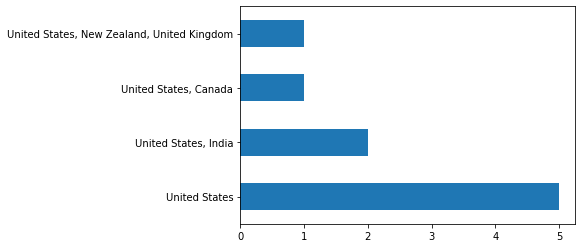

David Dhawan


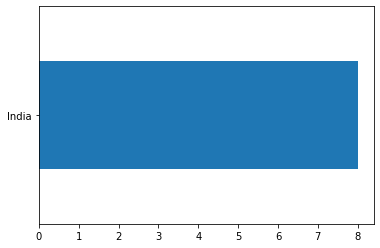

Lance Bangs


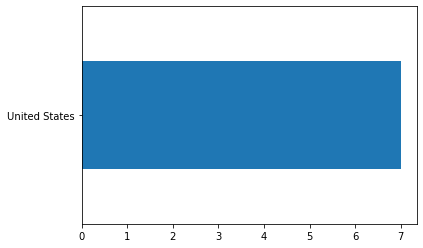

Johnnie To


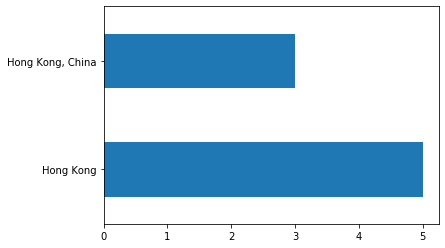

In [10]:
# where have these directors directed their movies
for x in directors:
    print(x)
    df_netflix[df_netflix.DIRECTOR == x].COUNTRY.value_counts().plot(kind = 'barh')
    plt.show()

In [11]:
# Country column: the ten most popular countries to film movies/series
df_netflix.COUNTRY.value_counts().head(10)

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: COUNTRY, dtype: int64

In [12]:
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'Canada', 'South Korea', 'Spain', 'France', 'Mexico', 'Turkey']

United States


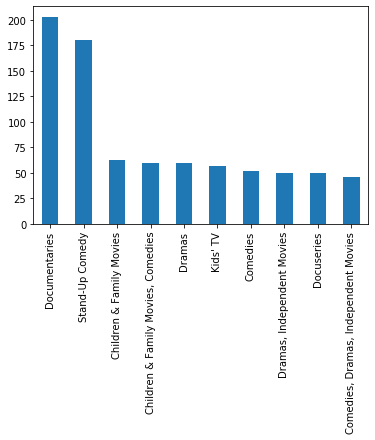

India


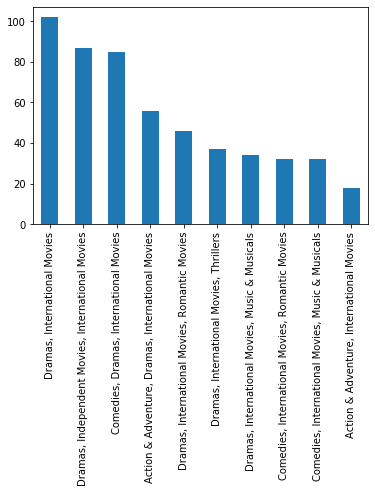

United Kingdom


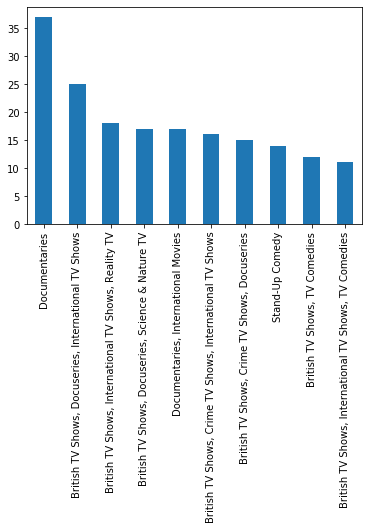

Japan


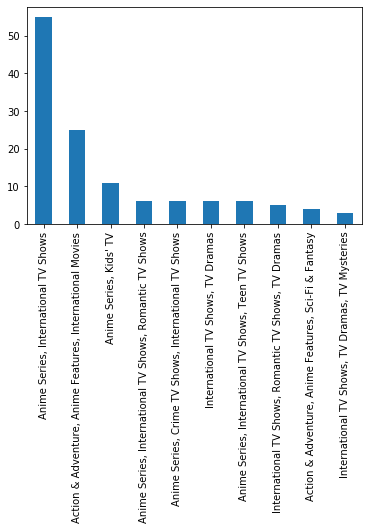

Canada


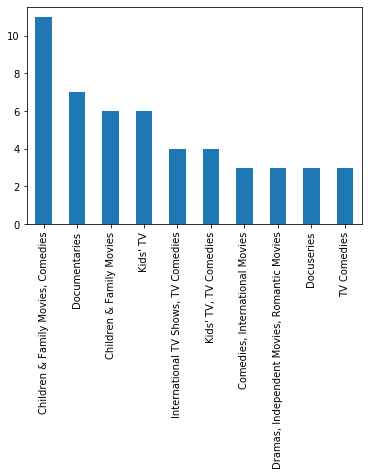

South Korea


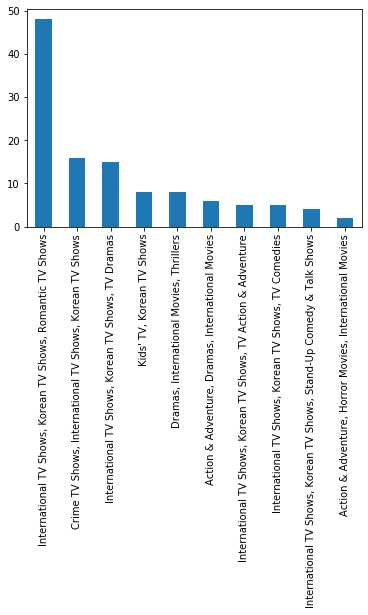

Spain


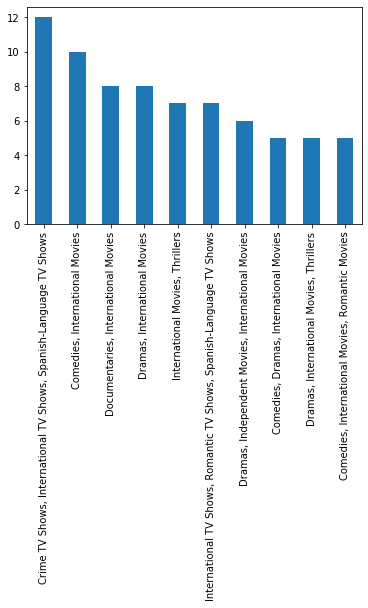

France


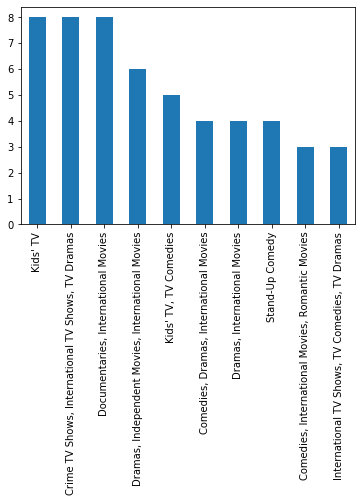

Mexico


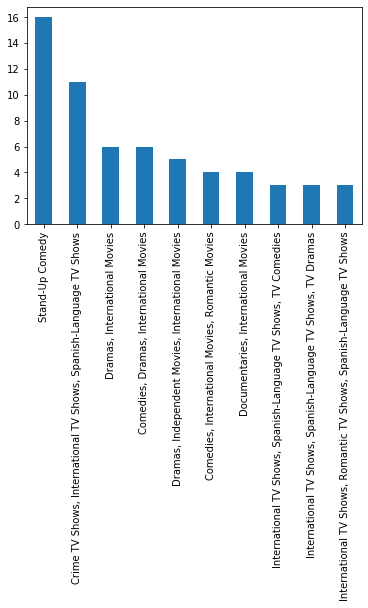

Turkey


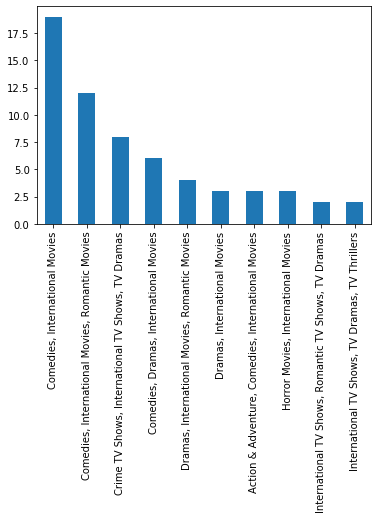

In [13]:
# what categories of shows/movies are the most popular in the top ten countries.
for i in countries:
    print(i)
    df_netflix[df_netflix.COUNTRY == i].LISTED_IN.value_counts().head(10).plot(kind = 'bar')
    plt.show()
    

In [14]:
# checking if there are any missing values
df_netflix.isnull().sum()

SHOW_ID            0
TYPE               0
TITLE              0
DIRECTOR        1969
CAST             570
COUNTRY          476
DATE_ADDED        11
RELEASE_YEAR       0
RATING            10
DURATION           0
LISTED_IN          0
DESCRIPTION        0
dtype: int64

In [15]:
# filling the missing values
df_netflix.DIRECTOR.fillna('unknown', inplace=True)
df_netflix.CAST.fillna('unknown', inplace=True)
df_netflix.COUNTRY.fillna('unknown', inplace=True)

In [16]:
# verifying that we have filled those missing values
df_netflix.isnull().sum()

SHOW_ID          0
TYPE             0
TITLE            0
DIRECTOR         0
CAST             0
COUNTRY          0
DATE_ADDED      11
RELEASE_YEAR     0
RATING          10
DURATION         0
LISTED_IN        0
DESCRIPTION      0
dtype: int64

In [17]:
# Date_added: let's see on what month more movies were added
# To do this I first need to use the .dt function but since the Dtype of the DATE_ADDED column is not datetime I cannot use it.
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SHOW_ID       6234 non-null   int64 
 1   TYPE          6234 non-null   object
 2   TITLE         6234 non-null   object
 3   DIRECTOR      6234 non-null   object
 4   CAST          6234 non-null   object
 5   COUNTRY       6234 non-null   object
 6   DATE_ADDED    6223 non-null   object
 7   RELEASE_YEAR  6234 non-null   int64 
 8   RATING        6224 non-null   object
 9   DURATION      6234 non-null   object
 10  LISTED_IN     6234 non-null   object
 11  DESCRIPTION   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [18]:
# here I will chance the Dtype of the DATE_ADDED column to datetime. Using the pandas function to_datetime
df_netflix['DATE_ADDED'] = pd.to_datetime(df_netflix['DATE_ADDED'])

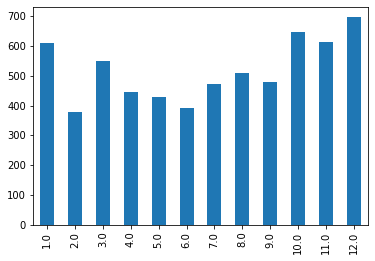

In [19]:
# here we can notice that December was the month where most movies were added to netflix.
df_netflix.DATE_ADDED.dt.month.value_counts().sort_index().plot(kind='bar')

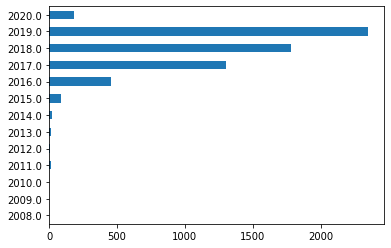

In [20]:
# let's now see in what year most movies were added in this data base
df_netflix.DATE_ADDED.dt.year.value_counts().sort_index().plot(kind='barh')


In [21]:
# Release Year: let's take a look at the release year column and see the top ten in terms of most releases in a year
df_netflix.RELEASE_YEAR.value_counts().head(10).reset_index()

,index,RELEASE_YEAR
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517
5,2014,288
6,2013,237
7,2012,183
8,2010,149
9,2011,136


In [22]:
# rating: let's take a look at the frequency of each rating 
df_netflix.RATING.value_counts().reset_index()

,index,RATING
0,TV-MA,2027
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286
5,NR,218
6,PG,184
7,TV-Y7,169
8,TV-G,149
9,TV-Y,143


In [23]:
# Duration: Let's see the tv show/movie with the longest duration
df_netflix.groupby('TYPE').DURATION.max().reset_index()

,TYPE,DURATION
0,Movie,99 min
1,TV Show,9 Seasons


In [24]:
# Listed in: let's see where these movies/shows are listed in
df_netflix.LISTED_IN.value_counts().head().reset_index()

,index,LISTED_IN
0,Documentaries,299
1,Stand-Up Comedy,273
2,"Dramas, International Movies",248
3,"Dramas, Independent Movies, International Movies",186
4,"Comedies, Dramas, International Movies",174


In [25]:
# Now that we know and understand our data let's anwser the following questions

#Understanding what content is available in different countries
#Network analysis of Actors / Directors and find interesting insights
#Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [26]:
#Understanding what content is available in different countries

In [27]:
# top ten countries with the most movies/tv shows
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'Canada', 'South Korea', 'Spain', 'France', 'Mexico', 'Turkey']

United States


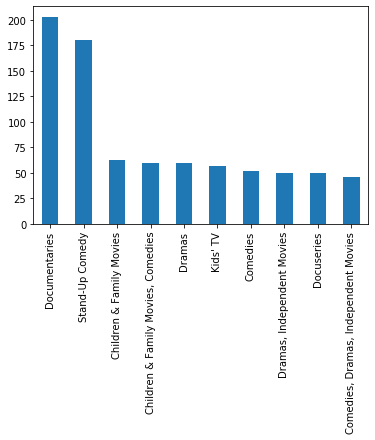

India


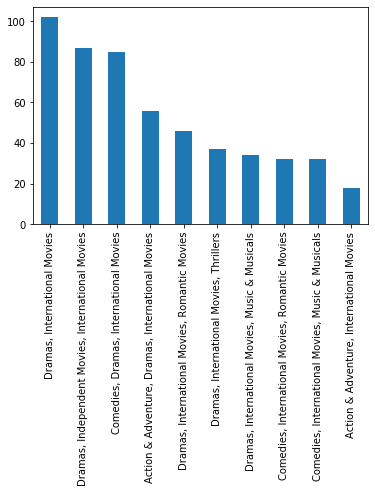

United Kingdom


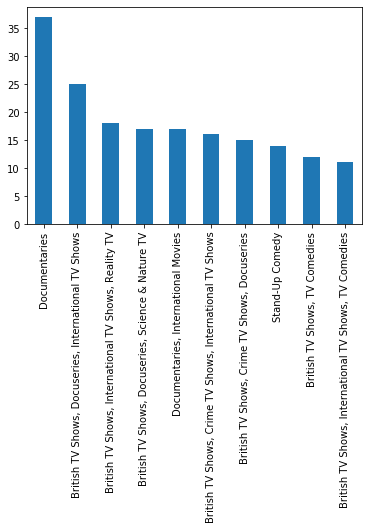

Japan


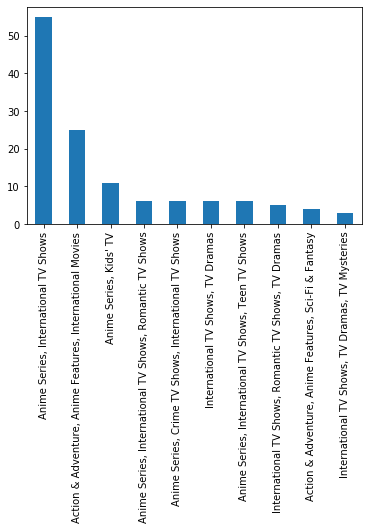

Canada


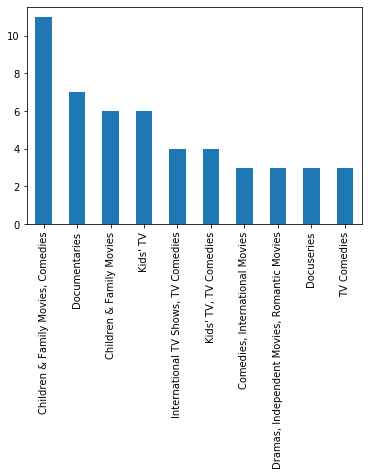

South Korea


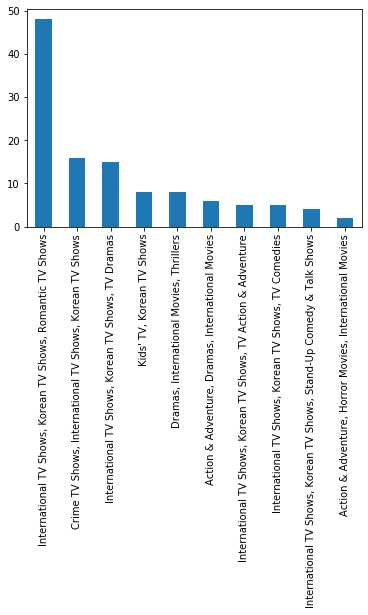

Spain


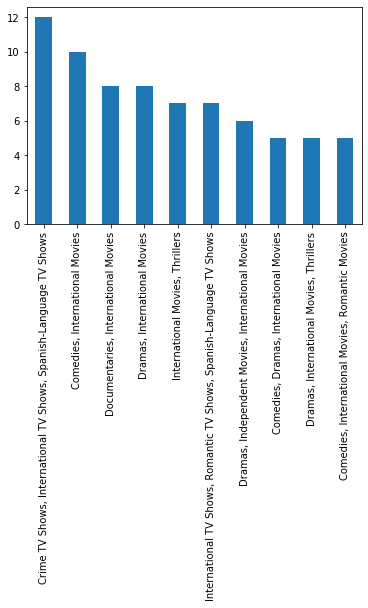

France


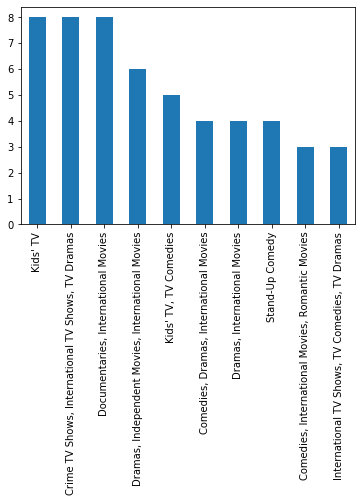

Mexico


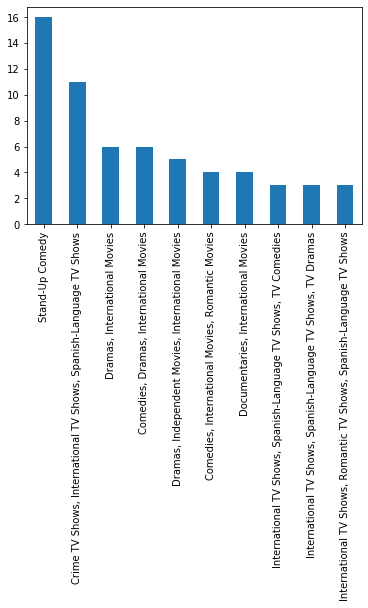

Turkey


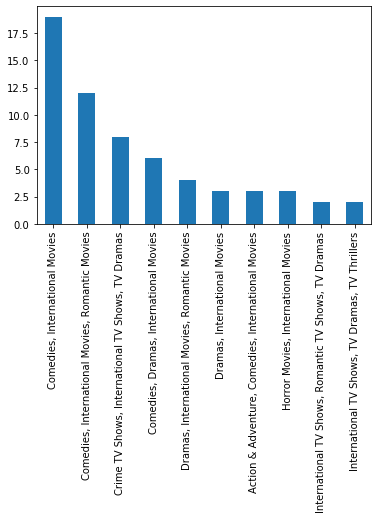

In [28]:
# understanding what content is available in each country
for i in countries:
    print(i)
    df_netflix[df_netflix.COUNTRY == i].LISTED_IN.value_counts().head(10).plot(kind='bar')
    plt.show()


United States


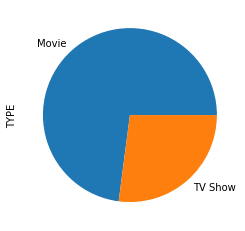

India


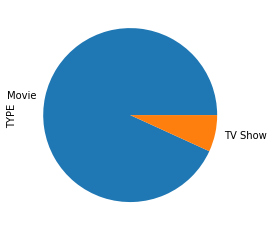

United Kingdom


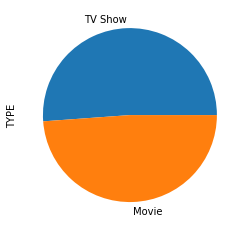

Japan


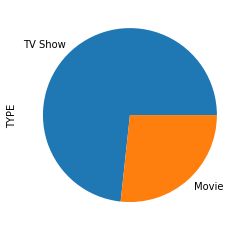

Canada


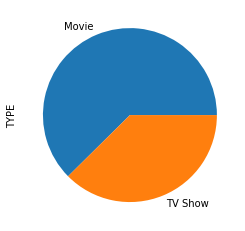

South Korea


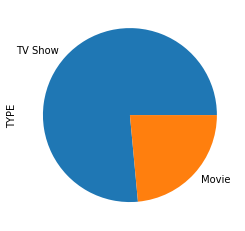

Spain


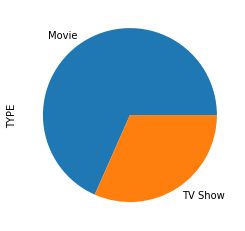

France


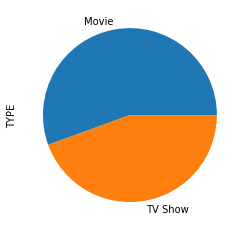

Mexico


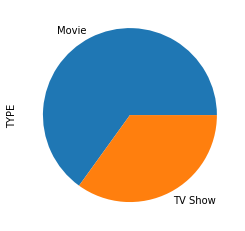

Turkey


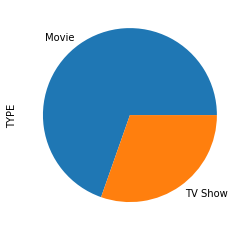

In [41]:
# on the top ten countries we could see the difference between countries 
# when it comes to the content that Netflix offers tv shows or movies
for x in countries:
    print(x)
    df_netflix[df_netflix.COUNTRY == x].TYPE.value_counts().plot(kind = 'pie')
    plt.show()
    

In [30]:
#Network analysis of Actors / Directors and find interesting insights

In [31]:
# create a list with the ten most famous actors
actors = ['David Attenborough', 'Samuel West', 'Jeff Dunham', 'Craig Sechler', 'Bill Burr', 'Iliza Shlesinger', 'Jim Gaffigan', 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal', 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson']

In [32]:
df_netflix.CAST.value_counts().head(10)[1:]

David Attenborough                                                                                      18
Samuel West                                                                                             10
Jeff Dunham                                                                                              7
Craig Sechler                                                                                            6
Bill Burr                                                                                                5
Iliza Shlesinger                                                                                         5
Jim Gaffigan                                                                                             5
Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep     4
Bill Hicks                                                                                               4
Name: CAST, dtype: int64

David Attenborough


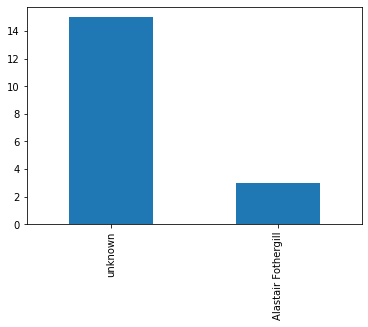

Samuel West


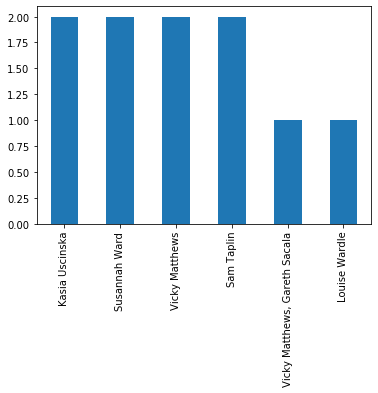

Jeff Dunham


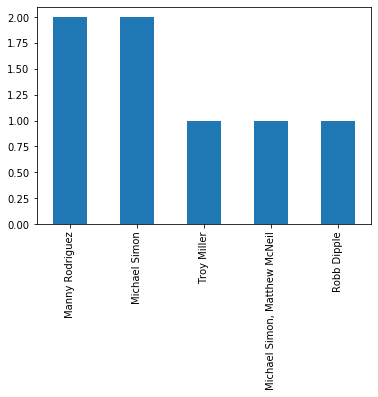

Craig Sechler


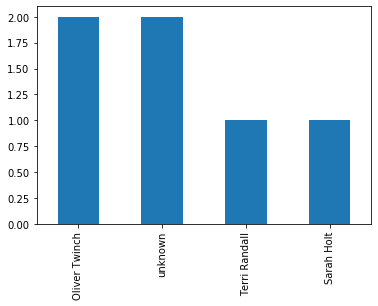

Bill Burr


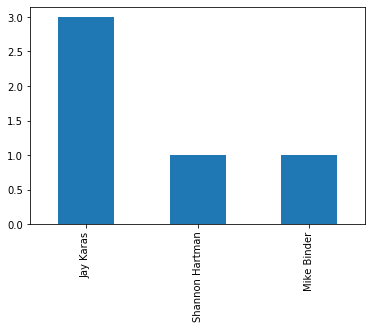

Iliza Shlesinger


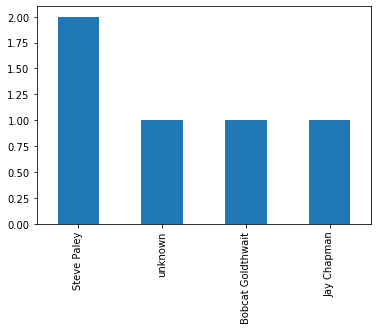

Jim Gaffigan


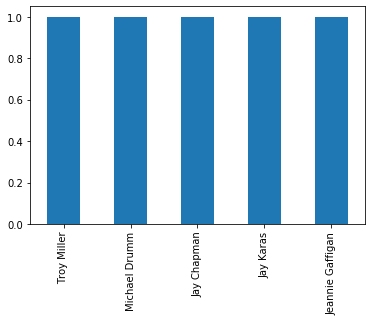

Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal


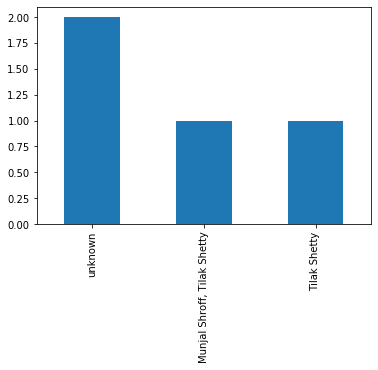

Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson


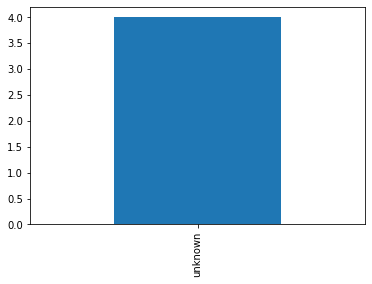

In [33]:
# for loop to see who has directed the movies where these actors acted
for y in actors:
    print(y)
    df_netflix[df_netflix.CAST == y].DIRECTOR.value_counts().plot(kind = 'bar')
    plt.show()

In [59]:
#Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [34]:
df_netflix.groupby('TYPE').DATE_ADDED.value_counts().head()

TYPE   DATE_ADDED
Movie  2020-01-01    111
       2019-11-01     84
       2018-03-01     75
       2019-12-31     69
       2018-10-01     65
Name: DATE_ADDED, dtype: int64

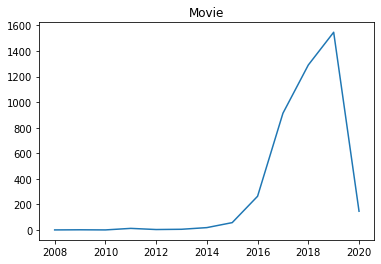

In [75]:
df_netflix[df_netflix.TYPE == 'Movie'].DATE_ADDED.dt.year.value_counts().sort_index().plot(title = 'Movie')

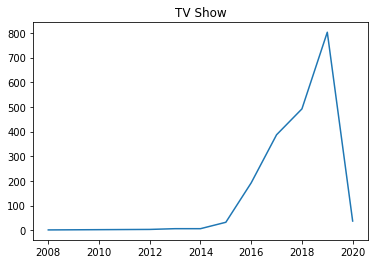

In [35]:
# towards 2018 we can see that the amount of tv shows are increasing at a faster pace than movies
df_netflix[df_netflix.TYPE == 'TV Show'].DATE_ADDED.dt.year.value_counts().sort_index().plot(title = 'TV Show')